In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("house.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df1= df.drop(["area_type", "availability", "society", "balcony"], axis=1)

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

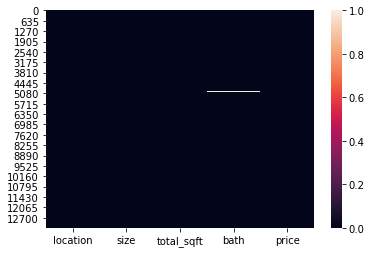

In [8]:
sns.heatmap(df1.isnull())

In [9]:
df2= df1.dropna()

In [10]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2["bedrooms"]= df2["size"].apply(lambda x : int(x.split(" ")[0]))

<ipython-input-12-398a75c98261>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bedrooms"]= df2["size"].apply(lambda x : int(x.split(" ")[0]))


In [13]:
df2.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2["bedrooms"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2["bedrooms"]>20]

,location,size,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df[~df["total_sqft"].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [19]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:

df3=df2.copy()
df3["sqft"]= df2["total_sqft"].apply(convert_sqft_to_num)


In [21]:
df3.drop(["total_sqft"], axis=1, inplace=True)

In [22]:
df3

,location,size,bath,price,bedrooms,sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0


In [23]:
df4= df3.copy()

In [24]:
df4["price_per_sqft"]= df4["price"]*100000/df4["sqft"]

In [25]:
df4

,location,size,bath,price,bedrooms,sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [26]:
df4["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [27]:
len(df4["location"].unique())

1304

In [28]:
df4["location"]=df4["location"].apply(lambda x : x.strip())

In [29]:
df["location"].value_counts()

Whitefield                                        540
Sarjapur  Road                                    399
Electronic City                                   302
Kanakpura Road                                    273
Thanisandra                                       234
                                                 ... 
Ananthanagar Phase 1,Electronic City , phase 2      1
Chikkanahalli                                       1
Hanuman Nagar                                       1
Binny Mills Employees Colony                        1
4 Bedroom Farm House in Bagalur                     1
Name: location, Length: 1305, dtype: int64

In [30]:
location_stats= df4.groupby("location")["location"].agg("count").sort_values(ascending= False)

In [31]:
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1052

In [33]:
location_stats_less_then_10= location_stats[location_stats<=10]
location_stats_less_then_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [34]:
df4

,location,size,bath,price,bedrooms,sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [35]:
df4["location"]= df4["location"].apply(lambda x: "other" if x in location_stats_less_then_10 else x)
len(df4.location.unique())

242

In [36]:
df4

,location,size,bath,price,bedrooms,sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [37]:
df4[df4["sqft"]/df4["bedrooms"]<300].head()

,location,size,bath,price,bedrooms,sqft,price_per_sqft
9,other,6 Bedroom,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,3.0,100.0,3,500.0,20000.000000


In [38]:
df4

,location,size,bath,price,bedrooms,sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [39]:
df5= df4[~(df4["sqft"]/df4["bedrooms"]<300)]
df5.shape

(12502, 7)

In [40]:
df5["sqft"].describe()

count    12456.000000
mean      1590.189927
std       1260.404795
min        300.000000
25%       1115.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: sqft, dtype: float64

In [41]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf["price_per_sqft"]>(m-st)) & (subdf["price_per_sqft"]<=(m+st))]
        df_out= pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out

df7=remove_pps_outliers(df5)
df7.shape
        

(10241, 7)

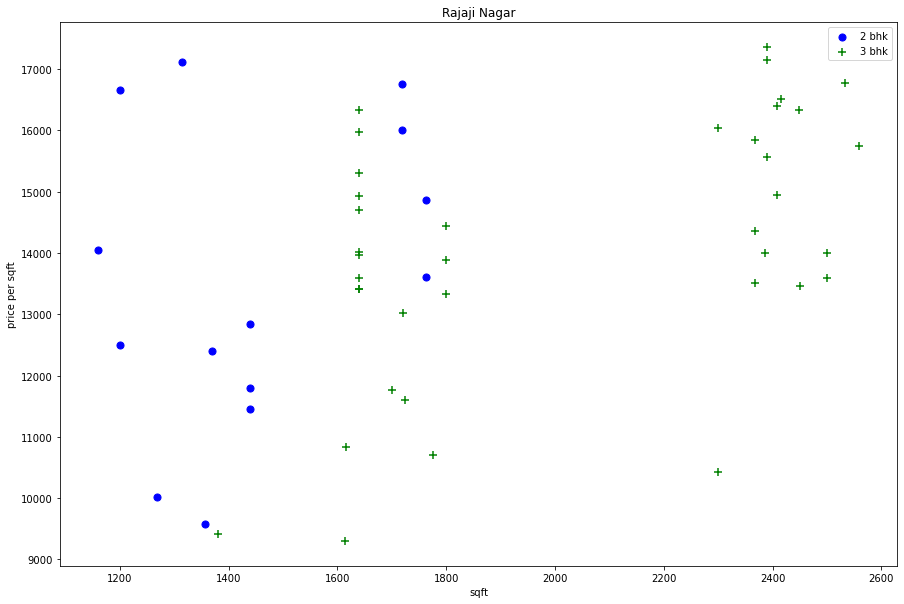

In [42]:
def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bedrooms==2)]
    bhk3= df[(df.location==location) & (df.bedrooms==3)]
    plt.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.sqft, bhk2.price_per_sqft, color= "blue", label= "2 bhk", s=50)
    plt.scatter(bhk3.sqft, bhk3.price_per_sqft, marker="+", color= "green", label= "3 bhk", s=50)
    plt.xlabel("sqft")
    plt.ylabel("price per sqft")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")

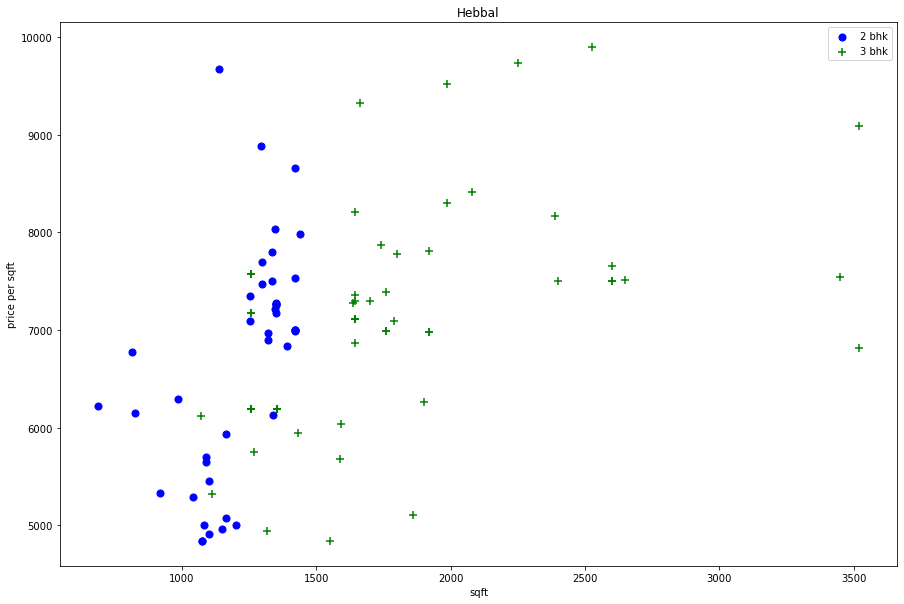

In [43]:
def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bedrooms==2)]
    bhk3= df[(df.location==location) & (df.bedrooms==3)]
    plt.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.sqft, bhk2.price_per_sqft, color= "blue", label= "2 bhk", s=50)
    plt.scatter(bhk3.sqft, bhk3.price_per_sqft, marker="+", color= "green", label= "3 bhk", s=50)
    plt.xlabel("sqft")
    plt.ylabel("price per sqft")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Hebbal")

In [44]:
def remove_bedrooms_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby("location"):
        bedrooms_stats={}
        for bedrooms, bedrooms_df in location_df.groupby("bedrooms"):
            bedrooms_stats[bedrooms]={
                "mean": np.mean(bedrooms_df.price_per_sqft),
                "std": np.std(bedrooms_df.price_per_sqft),
                "count": bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby("bedrooms"):
            stats=bedrooms_stats.get(bedrooms-1)
            if stats and stats["count"]>5:
                exclude_indices= np.append(exclude_indices, bedrooms_df[bedrooms_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")

df8= remove_bedrooms_outliers(df7)
df8.shape
            

(7329, 7)

In [45]:
df8

,location,size,bath,price,bedrooms,sqft,price_per_sqft
0,1st Block Jayanagar,4 BHK,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,2.0,148.0,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,2.0,70.0,2,1200.0,5833.333333
10233,other,1 BHK,1.0,200.0,1,1800.0,11111.111111
10236,other,2 BHK,2.0,110.0,2,1353.0,8130.081301
10237,other,1 Bedroom,1.0,26.0,1,812.0,3201.970443


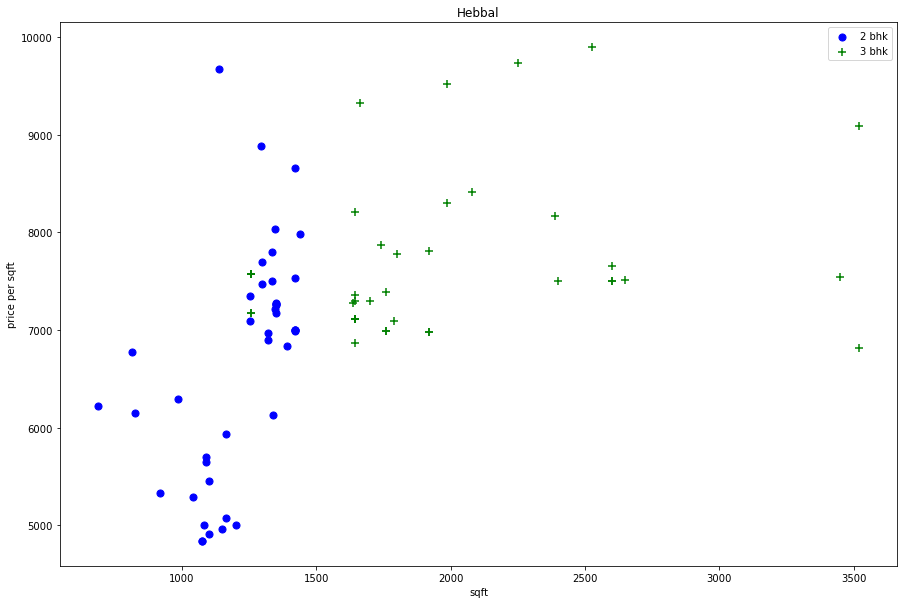

In [46]:
plot_scatter_chart(df8, "Hebbal")

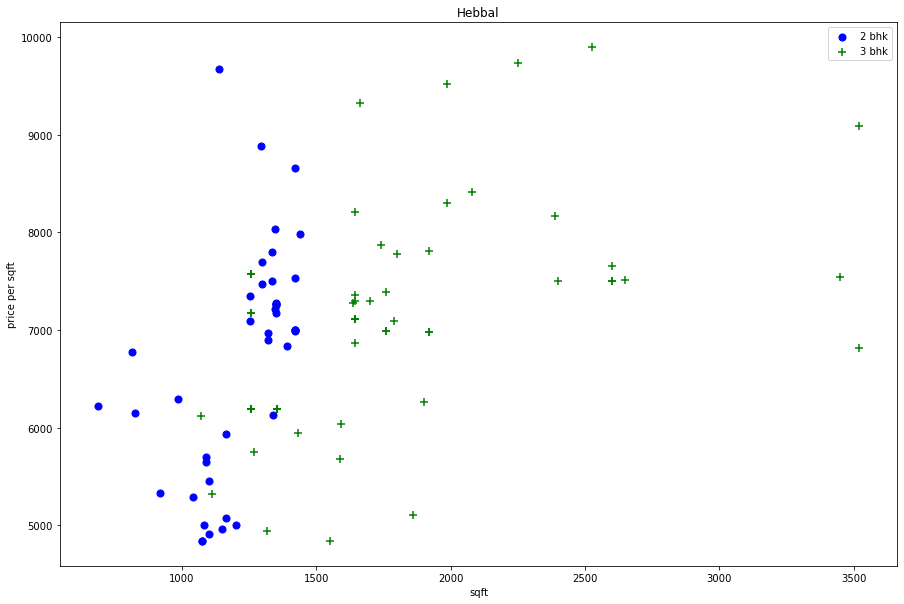

In [47]:
plot_scatter_chart(df7, "Hebbal")

Text(0, 0.5, 'Count')

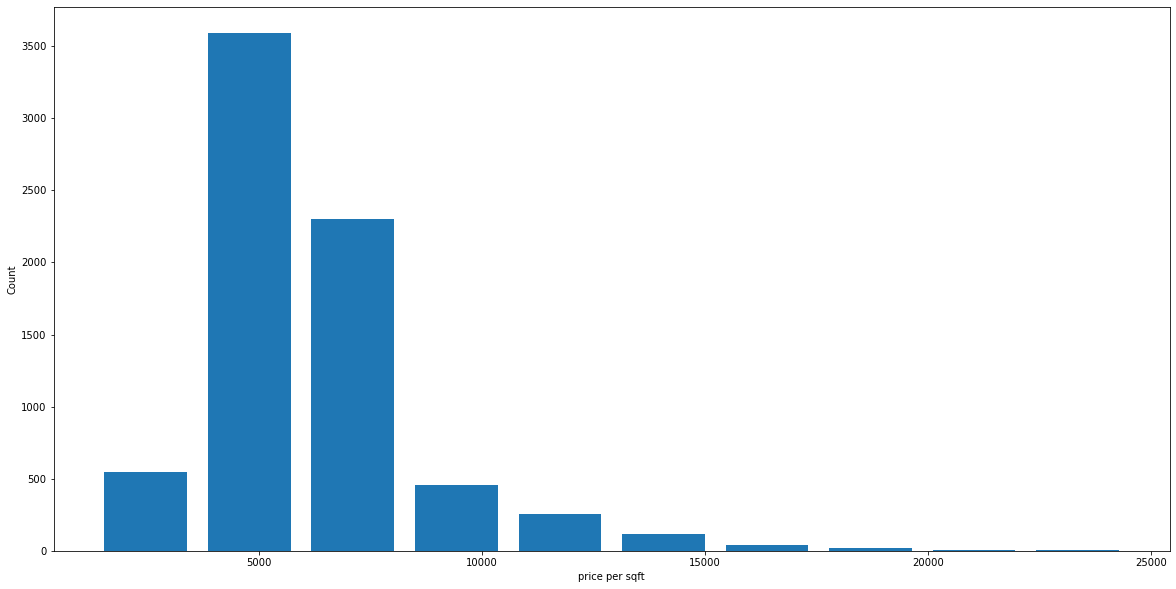

In [48]:
plt.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("Count")

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10]

,location,size,bath,price,bedrooms,sqft,price_per_sqft
5277,Neeladri Nagar,10 BHK,12.0,160.0,10,4000.0,4000.000000
8486,other,10 BHK,12.0,525.0,10,12000.0,4375.000000
8575,other,16 BHK,16.0,550.0,16,10000.0,5500.000000
9308,other,11 BHK,12.0,150.0,11,6000.0,2500.000000
9639,other,13 BHK,13.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'count')

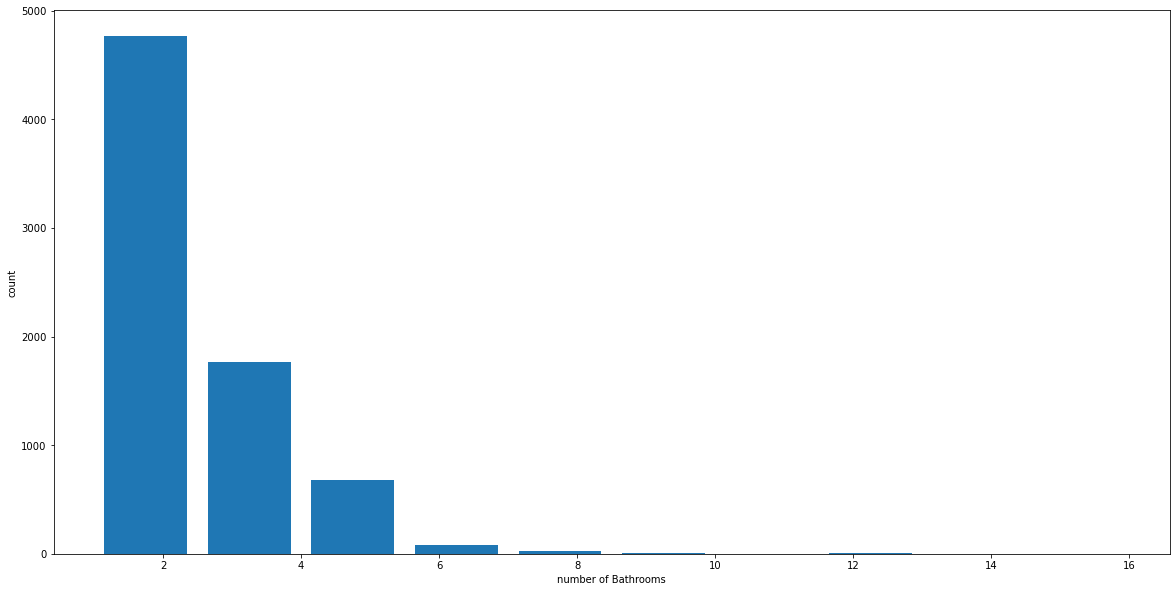

In [51]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("number of Bathrooms")
plt.ylabel("count")

In [52]:
df8[df8.bath>df8.bedrooms+2]

,location,size,bath,price,bedrooms,sqft,price_per_sqft
1626,Chikkabanavar,4 Bedroom,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,4 Bedroom,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,3 BHK,6.0,116.0,3,1806.0,6423.034330
8411,other,6 BHK,9.0,1000.0,6,11338.0,8819.897689


In [53]:
df9=df8[df8.bath<df8.bedrooms+2]
df9.shape

(7251, 7)

In [54]:
df10= df9.drop(["size", "price_per_sqft"], axis=1)

In [55]:
df10

,location,bath,price,bedrooms,sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0
...,...,...,...,...,...
10232,other,2.0,70.0,2,1200.0
10233,other,1.0,200.0,1,1800.0
10236,other,2.0,110.0,2,1353.0
10237,other,1.0,26.0,1,812.0


In [56]:
#sqft, bath, bedrooms
#['sqft', 'bath', 'bedrooms'] = ['bath','bedrooms', 'sqft' ]

df10 = df10[['location', 'sqft', 'bath', 'price', 'bedrooms',]]

In [57]:
df10

,location,sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [58]:
a=df10["location"].value_counts()

In [59]:
a.shape

(242,)

In [60]:
pd.get_dummies(df10["location"])

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
dummies= pd.get_dummies(df10["location"])

In [62]:
df11= pd.concat([df10, dummies.drop(["other"], axis=1)], axis=1)

In [63]:
df11.head()

,location,sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df12=df11.drop(["location"],axis=1)

In [65]:
df12.head()

,sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
x= df12.drop(["price"], axis=1)

In [67]:
x.head()

,sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y=df12["price"]

In [69]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=10)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr_clf= LinearRegression()
lr_clf.fit(x_train, y_train)

LinearRegression()

In [73]:
lr_clf.score(x_test, y_test)

0.8452277697874424

In [74]:
predict= lr_clf.predict(x_test)
predict

array([70.47896311, 33.09312356, 36.00433051, ..., 29.45805298,
       58.43306285, 68.60105208])

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [76]:
cv= ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)
cross_val_score(LinearRegression(), x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [77]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        }, # end of linear_reg
        
        'lasso' :{
            'model' : Lasso(),
            'params' :{
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        }, # end of Lasso
        
        'decision_tree' :{
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        } #end of DT
    }
    
    

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.740776,"{'criterion': 'mse', 'splitter': 'random'}"


In [78]:
x.columns

Index(['sqft', 'bath', 'bedrooms', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [79]:
np.where(x.columns=="2nd Phase Judicial Layout")[0][0]

5

In [84]:
def predict_price(location, sqft, bath, bedrooms):
    loc_index = np.where(x.columns == location)[0][0]
    
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bedrooms
    if loc_index >= 0:
        a[loc_index] = 1
        
    return lr_clf.predict([a])[0]


In [85]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

83.49904677226252

In [86]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

86.8051939525316

In [87]:
predict_price('Indira Nagar', 1000, 2, 3 )

179.5052770758254